In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1dODoVwyhIMNeqii0eEUYkYaoKPZMqsD7"
fluff, id = link.split('=')

In [0]:
import pandas as pd

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cleaned_dataset.csv')  
df = pd.read_csv('cleaned_dataset.csv')

transcripts = df["transcript"]

In [5]:
# title = df["title"].tolist()
# print(title)
!pip install num2words

     |████████████████████████████████| 102kB 2.4MB/s 


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer 
from nltk.tokenize import word_tokenize
from num2words import num2words

In [0]:
def change_to_lowercase(sentence):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + word.lower()
    return new_text

def remove_stopwords(sentence,sw):
    new_text = ""
    for word in sentence.split(" "):
        if word not in sw:
            new_text += " " + word
    return new_text

def remove_punctuation(sentence,symbols):
    for i in symbols:
        sentence = sentence.replace(i,' ')
    return sentence.replace("'", "")

def remove_single_char(sentence):
    new_text = ""
    for w in sentence.split(" "):
        if len(w) > 1:
            new_text += " " + w
            
    return new_text

def perform_stemming(sentence,stemmer):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + stemmer.stem(word)
    return new_text

def convert_numbers(sentence):
    new_text = ""
    for word in sentence.split(" "):
        if word.isnumeric():
            word = num2words(word)
        new_text += " " + word
        
    return new_text

def get_df(transcript_list):
    DF ={}
    for i in range(len(transcript_list)):
        tokens = transcript_list[i]
        for w in tokens.split(" "):
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
    return DF



In [0]:
import numpy as np
from nltk.corpus import stopwords

sw = stopwords.words('english')
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,"

transcript_list = []

for i, script in enumerate(transcripts):
    sentences = script.split(".")
    sentences = np.char.lower(sentences)
    cleaned_script = ""
    one_word_cleaned_script = ""
    for sentence in sentences:
        sentence = change_to_lowercase(sentence)
        #sentence = remove_stopwords(sentence,sw)
        sentence = remove_punctuation(sentence,symbols)
        #sentence = remove_single_char(sentence)
        #sentence = perform_stemming(sentence,stemmer)
        sentence = convert_numbers(sentence)
        cleaned_script += sentence
    transcript_list.append(cleaned_script)

In [0]:
#Tokenizing

transcript_list_tokennised = [transcript.split(" ") for transcript in transcript_list]
new_transcript_list_tokennised = []
for transcript in transcript_list_tokennised:
    list_of_tokens = []
    for word in transcript:
        if word != "" and word != "—" and len(word)>1:
            list_of_tokens.append(word)
    new_transcript_list_tokennised.append(list_of_tokens)

In [0]:
from collections import Counter

def get_pdf(new_transcript_list_tokennised):
    # get num docs with term
    term_list = []
    for d in new_transcript_list_tokennised:
        #Get Unique terms
        term_list += list(set(d))
    counter = Counter(term_list)
    for k,v in counter.items():
        counter[k] = np.exp(v/len(new_transcript_list_tokennised))
        
    return counter

def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus):
    vec1 = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq

In [0]:
cleaned_list_transcripts = [transcript.replace('\\',"") for transcript in transcript_list]
top2_words = get_top_n2_words(cleaned_list_transcripts)

In [0]:
def get_filtered_word_list(topn_words):
    topn_words_list = []
    for word in topn_words:
        if word[1]>5:
            topn_words_list.append(word)
        else:
            break

    return topn_words_list

In [0]:
top2_words_list = get_filtered_word_list(top2_words)

In [0]:
top2words_counter = 0

for words in top2_words_list:
    top2words_counter+= words[1]

In [0]:
top_2_words_tokenised = [word[0] for word in top2_words_list]

In [0]:
def get_n_pdf(top_words,count):
    pdf_dict = {}
    for item in top_words:
        pdf_dict[item[0]] = np.exp(item[1]/count)
    return pdf_dict

In [0]:
pdf_counter2_obj = get_n_pdf(top2_words_list,2340)

In [0]:
def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter

In [0]:
def get_terms_list(transcript_list_tokennised):
    terms_list = []
    for transcript in transcript_list_tokennised:
        terms_list += set(transcript)

    return terms_list

In [0]:
two_word_terms_list = get_terms_list(top_2_words_tokenised)

In [0]:
def get_transcript_tokenised_list(top_n_words_tokenised,transcripts):
    ret_list = []
    for index,transcript in enumerate(transcripts):
        transcript_list = []
        for word in top_n_words_tokenised:
            if word in transcript:
                transcript_list.append(word)
        ret_list.append(transcript_list)
        
    return ret_list

In [0]:
new_transcript_list_2tokenised = get_transcript_tokenised_list(top_2_words_tokenised,cleaned_list_transcripts)

In [0]:
tf_pdf2_dict = {}

for index, doc in enumerate(new_transcript_list_2tokenised):
    tf_pdf2_dict[index] = {}
    ret_dict = get_tf(doc)
    for key,val in ret_dict.items():
        tf_pdf2_dict[index][key] = val*pdf_counter2_obj[key] 
    for word in two_word_terms_list:
        if word not in ret_dict.keys():
            tf_pdf2_dict[index][word] = 0     

In [0]:
def get_norm_value(tf_pdf_dict):
    word_score_dict = {}
    for key,value in tf_pdf_dict.items():
        for word, score in value.items():
            if word in word_score_dict.keys():
                word_score_dict[word] += score
            else:
                word_score_dict[word] = score
    return word_score_dict

In [0]:
total_norm_val_pdf2_dict = get_norm_value(tf_pdf2_dict)

In [0]:
tf_pdf2_list = []

for k,v in tf_pdf2_dict.items():
    tf_pdf2_list.append(v)

In [29]:
df_features_2 = pd.DataFrame(tf_pdf2_list)
df_features_2.fillna(0)

,of the,in the,this is,and the,going to,to the,to be,on the,you can,at the,that we,is the,if you,to do,the world,it was,we have,want to,and we,and then,we can,one of,have to,you know,is that,for the,kind of,and so,that the,with the,from the,the same,it is,and it,and they,the first,all the,and you,you have,thank you,...,subject but,powerful they,from if,outcome the,that called,procedure and,sialic acid,worker ownership,todai robot,king jr,opportunity this,bank which,finance we,smog free,radical transparency,idea meritocracy,galaxies but,garden the,pattern but,workers so,earth if,university but,free it,have team,anyway the,reason think,law we,ca what,if young,for few,anything now,making but,country it,country its,have brother,understand but,fish but,robots but,individual but,going what
0,13.982546,7.886561,0.102401,0.041812,0.031766,0.028547,0.028099,0.019911,0.009829,0.008391,0.008327,0.007810,0.007372,0.007294,0.006702,0.006676,0.006267,0.005990,0.005100,0.005046,0.004916,0.004560,0.004275,0.004103,0.004093,0.003972,0.003907,0.003273,0.003205,0.003084,0.003011,0.002929,0.002925,0.002799,0.002749,0.002629,0.002561,0.002555,0.002358,0.002308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19.800496,11.168054,0.145009,0.059209,0.044983,0.040425,0.039791,0.028196,0.013918,0.011883,0.000000,0.011060,0.010440,0.010329,0.009491,0.009454,0.008875,0.008482,0.007223,0.007146,0.006962,0.006458,0.006054,0.005811,0.000000,0.005625,0.005532,0.004635,0.004539,0.004368,0.004264,0.004148,0.004142,0.003964,0.000000,0.000000,0.000000,0.000000,0.003340,0.003269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,13.853918,7.814012,0.101459,0.041427,0.031473,0.028284,0.027841,0.019728,0.009738,0.008314,0.008250,0.007738,0.007304,0.007227,0.006640,0.006615,0.000000,0.005934,0.005054,0.005000,0.004871,0.004518,0.004236,0.004066,0.004055,0.003936,0.003871,0.003243,0.003176,0.003056,0.002984,0.002902,0.000000,0.002773,0.002724,0.002605,0.002538,0.002531,0.002337,0.002287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,13.647143,7.697385,0.099945,0.040809,0.031004,0.027862,0.027425,0.019434,0.009593,0.008190,0.008127,0.007623,0.007195,0.007119,0.006541,0.006516,0.006117,0.005846,0.004978,0.000000,0.004798,0.004451,0.000000,0.000000,0.000000,0.003877,0.000000,0.000000,0.003128,0.003010,0.002939,0.000000,0.002855,0.000000,0.002683,0.002566,0.002500,0.002493,0.002302,0.002253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,14.334849,8.085271,0.104981,0.042865,0.032566,0.029266,0.028807,0.020413,0.010076,0.008603,0.000000,0.008007,0.007558,0.007478,0.006871,0.006844,0.006425,0.006140,0.005229,0.005173,0.005040,0.004675,0.004383,0.004207,0.004196,0.000000,0.000000,0.003356,0.003286,0.003162,0.003087,0.003003,0.000000,0.002870,0.002819,0.002695,0.002626,0.002619,0.002418,0.002367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,32.285045,18.209702,0.236440,0.096541,0.0

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1gAEfY0SiWVWovW6buJkox8mQilsA7xl0"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('exported.csv')  
target_df = pd.read_csv('exported.csv')


In [0]:
target_y = target_df["normalised_count_per_view"].values
target_y=target_y.astype('int')

df_features_2 = df_features_2.fillna(0)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature_to_pass_2 = df_features_2.values.astype('float')
X_new_2 = SelectKBest(chi2, k=1000).fit(feature_to_pass_2,target_y)

In [0]:
cols = X_new_2.get_support(indices=True)


features_df_new = df_features_2.iloc[:,cols]

In [59]:
features_df_new

,of the,in the,this is,and the,going to,to the,to be,on the,you can,at the,that we,is the,if you,to do,it was,want to,and we,and then,we can,one of,for the,kind of,and so,that the,with the,from the,it is,and it,the first,all the,and you,thank you,which is,in this,and that,need to,and its,if we,there is,into the,...,lets play,the footage,of tiny,five meters,by paying,the items,objects and,to sculpt,cover and,swarm of,painting and,camera and,finding things,artist who,new perspective,robots to,discover and,is wearing,blood is,sensor that,other artists,developed these,of professor,crowd sourcing,and painting,music thank,musical instrument,make robots,music by,3d printed,3d space,tissue that,objects to,musical score,bye bye,robot thats,integral part,3d printing,dreamt of,pioneers of
0,13.982546,7.886561,0.102401,0.041812,0.031766,0.028547,0.028099,0.019911,0.009829,0.008391,0.008327,0.007810,0.007372,0.007294,0.006676,0.005990,0.005100,0.005046,0.004916,0.004560,0.003972,0.003907,0.003273,0.003205,0.003084,0.003011,0.002925,0.002799,0.002629,0.002561,0.002555,0.002308,0.002190,0.002111,0.002000,0.001966,0.001854,0.001796,0.001657,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.800496,11.168054,0.145009,0.059209,0.044983,0.040425,0.039791,0.028196,0.013918,0.011883,0.000000,0.011060,0.010440,0.010329,0.009454,0.008482,0.007223,0.007146,0.006962,0.006458,0.005625,0.005532,0.004635,0.004539,0.004368,0.004264,0.004142,0.003964,0.000000,0.000000,0.000000,0.003269,0.000000,0.002990,0.000000,0.000000,0.002625,0.002543,0.002346,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.853918,7.814012,0.101459,0.041427,0.031473,0.028284,0.027841,0.019728,0.009738,0.008314,0.008250,0.007738,0.007304,0.007227,0.006615,0.005934,0.005054,0.005000,0.004871,0.004518,0.003936,0.003871,0.003243,0.003176,0.003056,0.002984,0.000000,0.002773,0.002605,0.002538,0.002531,0.002287,0.002170,0.000000,0.001981,0.001948,0.001837,0.000000,0.001642,0.001624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.647143,7.697385,0.099945,0.040809,0.031004,0.027862,0.027425,0.019434,0.009593,0.008190,0.008127,0.007623,0.007195,0.007119,0.006516,0.005846,0.004978,0.000000,0.004798,0.004451,0.003877,0.000000,0.000000,0.003128,0.003010,0.002939,0.002855,0.000000,0.002566,0.002500,0.002493,0.002253,0.000000,0.002061,0.001952,0.001919,0.000000,0.000000,0.001617,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.334849,8.085271,0.104981,0.042865,0.032566,0.029266,0.028807,0.020413,0.010076,0.008603,0.000000,0.008007,0.007558,0.007478,0.006844,0.006140,0.005229,0.005173,0.005040,0.004675,0.000000,0.000000,0.003356,0.003286,0.003162,0.003087,0.000000,0.002870,0.002695,0.002626,0.002619,0.002367,0.002245,0.002164,0.002050,0.002015,0.001901,0.001841,0.001699,0.001680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,32.285045,18.209702,0.236440,0.096541,0.000000,0.065913,0.064879,0.045974,0.000000,0.019375,0.019227,0.000000,0.017022,0.000000,0.000000,0.000000,0.000000,0.000000,0.011352,0.010529,0.009172,0

In [60]:
X_new_2.scores_[cols]

array([9.26578907e+02, 5.86674857e+02, 3.17025473e+00, 2.77701486e+00,
       4.06388924e-01, 2.10601913e+00, 7.33150587e-01, 1.10478888e+00,
       4.05494432e-01, 3.06999087e-01, 1.67008958e-02, 1.51194026e-01,
       1.23296802e-02, 2.08750960e-02, 1.87371840e-01, 3.25550786e-02,
       6.96196359e-02, 1.75672036e-01, 1.51784894e-02, 6.94449090e-02,
       2.68782623e-02, 6.42242079e-02, 5.75710209e-02, 1.17092754e-02,
       1.34030970e-01, 7.05098239e-02, 2.79726470e-02, 7.64425800e-02,
       3.28948833e-02, 3.37905468e-02, 2.76134277e-02, 4.80226077e-01,
       2.35503562e-02, 1.87611477e-02, 1.48365083e-02, 4.07989320e-02,
       1.96044172e-02, 1.92370746e-02, 1.14020410e-02, 4.66781452e-02,
       2.91497027e-02, 2.20389285e-02, 1.63609595e-02, 7.21313279e-02,
       1.06589421e-01, 1.70449239e-02, 1.29958209e-02, 1.71783822e-02,
       1.37454166e-02, 3.22298957e-02, 3.65123782e-02, 1.28962219e-02,
       1.41999004e-02, 1.29805519e-02, 4.71793850e-02, 2.22411292e-02,
      

<BarContainer object of 1000 artists>

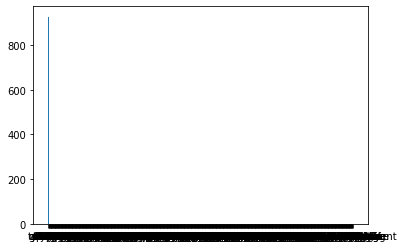

In [61]:
import matplotlib.pyplot as plt

plt.bar(features_df_new.columns, X_new_2.scores_[cols])

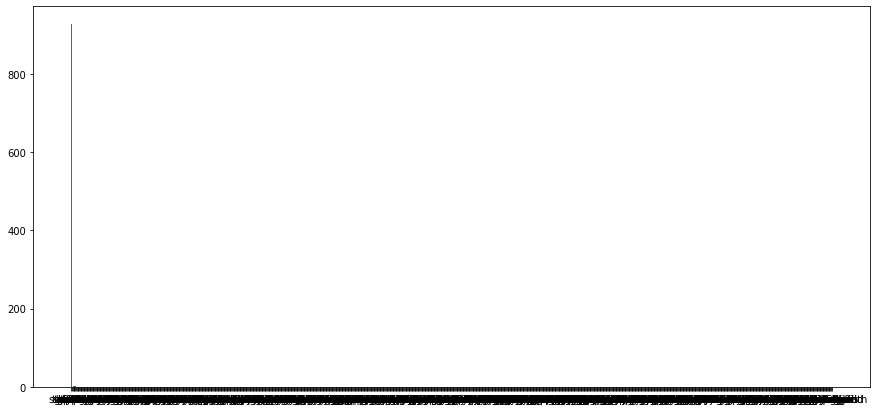

In [62]:
sorted_k_features = list(sorted(list(zip(features_df_new.columns, X_new_2.scores_[cols])), key=lambda x: x[1], reverse=True))
features, scores = list(zip(*sorted_k_features))

plt.figure(figsize=(15, 7))
plt.bar(features, scores)
plt.show()

In [0]:
selected_scores = [score for score in scores if score > 0.4]

In [66]:
len(selected_scores)

10

In [0]:
X_new_2 = SelectKBest(chi2, k=10).fit(feature_to_pass_2,target_y)

cols = X_new_2.get_support(indices=True)

features_df_new = df_features_2.iloc[:,cols]

In [69]:
features_df_new

,of the,in the,this is,and the,going to,to the,to be,on the,you can,thank you
0,13.982546,7.886561,0.102401,0.041812,0.031766,0.028547,0.028099,0.019911,0.009829,0.002308
1,19.800496,11.168054,0.145009,0.059209,0.044983,0.040425,0.039791,0.028196,0.013918,0.003269
2,13.853918,7.814012,0.101459,0.041427,0.031473,0.028284,0.027841,0.019728,0.009738,0.002287
3,13.647143,7.697385,0.099945,0.040809,0.031004,0.027862,0.027425,0.019434,0.009593,0.002253
4,14.334849,8.085271,0.104981,0.042865,0.032566,0.029266,0.028807,0.020413,0.010076,0.002367
...,...,...,...,...,...,...,...,...,...,...
2335,32.285045,18.209702,0.236440,0.096541,0.000000,0.065913,0.064879,0.045974,0.000000,0.005330
2336,53.899033,30.400619,0.394730,0.161172,0.000000,0.110041,0.108314,0.076753,0.000000,0.008899
2337,24.688564,13.925067,0.180807,0.073825,0.056088,0.050404,0.049614,0.000000,0.017354,0.004076
2338,16.496160,9.304313,0.120810,0.049328,0.037476,0.033679,0.033150,0.023491,0.000000,0.002723


In [0]:
from google.colab import files

features_df_new.to_csv('features_bigram.csv')

files.download('features_bigram.csv')